# Problem Statement
### AtliQ Motors is an automotive giant from the USA specializing in electric vehicles (EV). In the last 5 years, their market share rose to 25% in electric and hybrid vehicles segment in North America.

### As a part of their expansion plans, they wanted to launch their bestselling models in India where their market share is less than 2%. Bruce Haryali, the chief of AtliQ Motors India wanted to do a detailed market study of existing EV/Hybrid market in India before proceeding further. Bruce gave this task to the data analytics team of AtliQ motors and Peter Pandey is the data analyst working in this team. 

- Expansion
- Market Study


In [1]:
# What's happening in your market or industery?
# Who are your competitors?
# What cusotmers do you serve?
# How are we performing?

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf as run
import datetime

In [3]:
states = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\EV\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_state.csv")
date = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\EV\RPC12_Input_For_Participants\datasets\dim_date.csv")

In [4]:
states.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,1-Apr-21,Sikkim,2-Wheelers,0,398
1,1-Apr-21,Sikkim,4-Wheelers,0,361
2,1-May-21,Sikkim,2-Wheelers,0,113
3,1-May-21,Sikkim,4-Wheelers,0,98
4,1-Jun-21,Sikkim,2-Wheelers,0,229


In [5]:
date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [6]:
states['date'] = pd.to_datetime(states['date'])
date['date'] = pd.to_datetime(date['date'])

C:\Users\m\AppData\Local\Temp\ipykernel_41804\3033303515.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  states['date'] = pd.to_datetime(states['date'])
C:\Users\m\AppData\Local\Temp\ipykernel_41804\3033303515.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date['date'] = pd.to_datetime(date['date'])


In [7]:
df= pd.merge(states,date)
df

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1
3,2021-04-01,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1
4,2021-04-01,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1
...,...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,2024-03-01,Manipur,2-Wheelers,13,1394,2024,Q4
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [8]:
df.dtypes

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
fiscal_year                        int64
quarter                           object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
 5   fiscal_year             2445 non-null   int64         
 6   quarter                 2445 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 133.8+ KB


In [10]:
df.nunique()

date                        36
state                       35
vehicle_category             2
electric_vehicles_sold     921
total_vehicles_sold       2225
fiscal_year                  3
quarter                      4
dtype: int64

In [11]:
df['FV'] = df['total_vehicles_sold'] - df['electric_vehicles_sold']

In [12]:
df.rename(columns = {'electric_vehicles_sold' : 'EV', 'total_vehicles_sold' : 'Total'}, inplace = True)

In [13]:
df.describe()

,date,EV,Total,fiscal_year,FV
count,2445,2445.000000,2445.000000,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116800,847.737014,23409.606544,2022.999591,22561.869530
min,2021-04-01 00:00:00,0.000000,1.000000,2022.000000,1.000000
25%,2022-01-01 00:00:00,2.000000,1160.000000,2022.000000,1145.000000
50%,2022-09-01 00:00:00,54.000000,6098.000000,2023.000000,6011.000000
75%,2023-06-01 00:00:00,534.000000,29396.000000,2024.000000,28533.000000
max,2024-03-01 00:00:00,26668.000000,387983.000000,2024.000000,382656.000000
std,NaN,2189.110820,38350.646607,0.816413,36881.309602


# What is the current state of EV market in India? How does the trend look like?

In [14]:
df_dt= df.set_index('date')

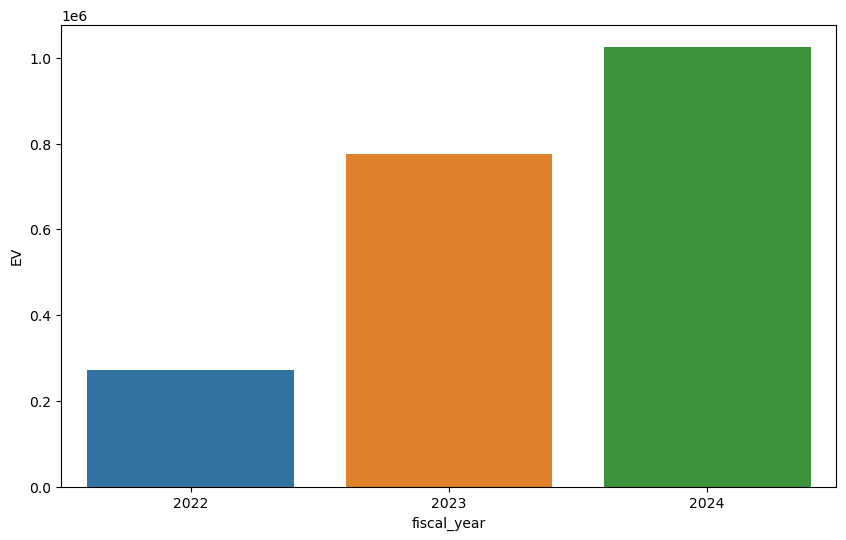

In [15]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'fiscal_year', y = 'EV',
             estimator = 'sum', errorbar = None)
plt.show()

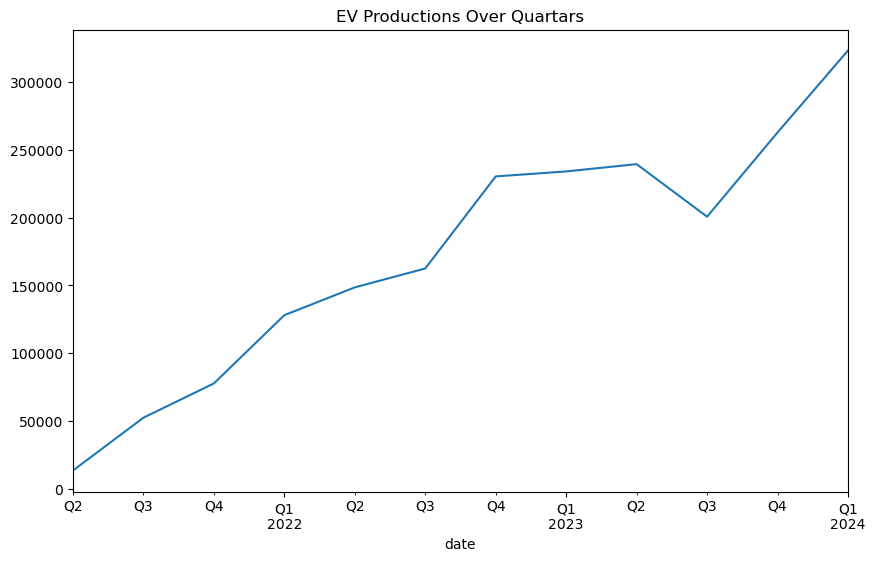

In [16]:
plt.figure(figsize = (10,6))
df_dt['EV'].resample('Q').sum().plot(kind = 'line')
plt.title('EV Productions Over Quartars')
plt.show()

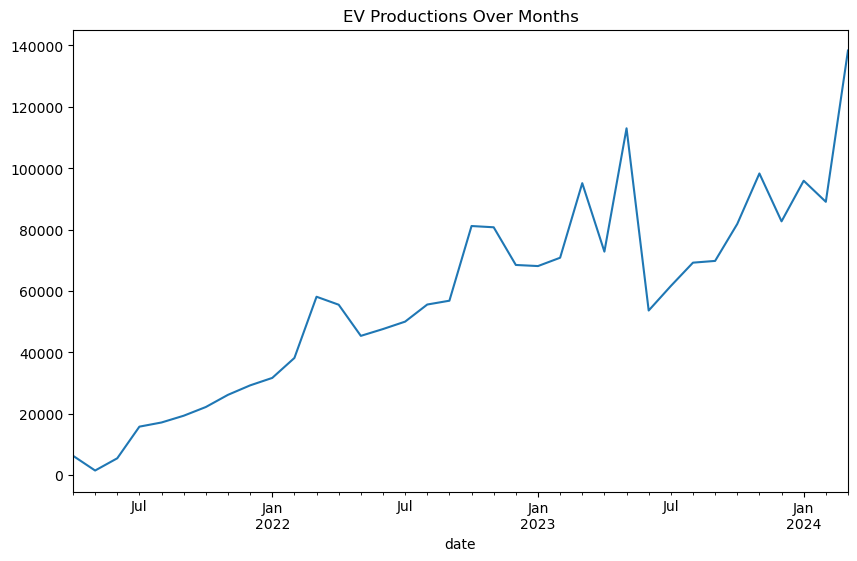

In [17]:
plt.figure(figsize = (10,6))
df_dt['EV'].resample('M').sum().plot(kind = 'line')
plt.title('EV Productions Over Months')
plt.show()

# CAGR

In [18]:
years_sales = df.pivot_table(index = 'fiscal_year',
                   values = ['EV', 'FV', 'Total'],
                   aggfunc = 'sum').sort_values(by = 'fiscal_year')
years_sales

,EV,FV,Total
fiscal_year,,,
2022,271150,16150674,16421824
2023,775368,18845811,19621179
2024,1026199,20167286,21193485


In [19]:
EV_2022 = df[df['fiscal_year'] == 2022]['EV'].sum()
EV_2024 = df[df['fiscal_year'] == 2024]['EV'].sum()

In [20]:
print(f'Compound Annual Growth Rate = {round((((EV_2024/EV_2022)**(1/3)) - 1) * 100,2)}')

Compound Annual Growth Rate = 55.84


# YOY Change

In [21]:
years_sales['EV'].pct_change() * 100

fiscal_year
2022           NaN
2023    185.955375
2024     32.349929
Name: EV, dtype: float64

# EV percentage of total vehicles

In [22]:
round((years_sales['EV']/years_sales['Total']) * 100,2)

fiscal_year
2022    1.65
2023    3.95
2024    4.84
dtype: float64

# States Comparison

In [23]:
state_sales = df.pivot_table(index = 'state',
                   values = ['EV', 'FV', 'Total'],
                   aggfunc = 'sum').sort_values(by = 'EV', ascending = False)

In [24]:
Total_EV = state_sales['EV'].sum()

# Top 10 States in %

In [25]:
top_10 = round((state_sales['EV']/Total_EV) * 100,2).head(10).index
round((state_sales['EV']/Total_EV) * 100,2).head(10)

state
Maharashtra       19.11
Karnataka         15.10
Tamil Nadu         9.65
Gujarat            8.75
Rajasthan          7.25
Kerala             6.93
Delhi              5.18
Uttar Pradesh      4.59
Madhya Pradesh     3.81
Odisha             3.78
Name: EV, dtype: float64

# Bottom 10 States in %

In [26]:
round((state_sales['EV']/Total_EV) * 100,2).tail(10)

state
DNH and DD                  0.02
Mizoram                     0.02
Manipur                     0.01
Meghalaya                   0.01
Andaman & Nicobar Island    0.00
Ladakh                      0.00
Arunachal Pradesh           0.00
Nagaland                    0.00
Andaman & Nicobar           0.00
Sikkim                      0.00
Name: EV, dtype: float64

# Growing States in the last year

In [27]:
states_year = df[df['state'].isin(top_10)].pivot_table(index = ['state', 'fiscal_year'],
                   values = 'EV',
                   aggfunc = 'sum').sort_values(by = ['state','fiscal_year'])
states_year

EV
state          fiscal_year        
Delhi          2022          16535
               2023          44053
               2024          46724
Gujarat        2022          18026
               2023          79004
               2024          84359
Karnataka      2022          43111
               2023         108895
               2024         160989
Kerala         2022          13639
               2023          49483
               2024          80544
Madhya Pradesh 2022           7916
               2023          27840
               2024          43223
Maharashtra    2022          48374
               2023         150502
               2024         197169
Odisha         2022           9498
               2023          29651
               2024          39118
Rajasthan      2022          20087
               2023          63835
               2024          66444
Tamil Nadu     2022          36863
               2023          68885
               2024          94314
Uttar Pradesh  2022          10222
               2023          27223
               2024          57758

In [28]:
states_year['YOY'] = round(states_year['EV'].pct_change() * 100,2)

In [29]:
states_year = states_year.reset_index()

In [30]:
states_year[states_year['fiscal_year']== 2024].sort_values(by = 'YOY', ascending = False)

,state,fiscal_year,EV,YOY
29,Uttar Pradesh,2024,57758,112.17
11,Kerala,2024,80544,62.77
14,Madhya Pradesh,2024,43223,55.26
8,Karnataka,2024,160989,47.84
26,Tamil Nadu,2024,94314,36.92
20,Odisha,2024,39118,31.93
17,Maharashtra,2024,197169,31.01
5,Gujarat,2024,84359,6.78
2,Delhi,2024,46724,6.06
23,Rajasthan,2024,66444,4.09


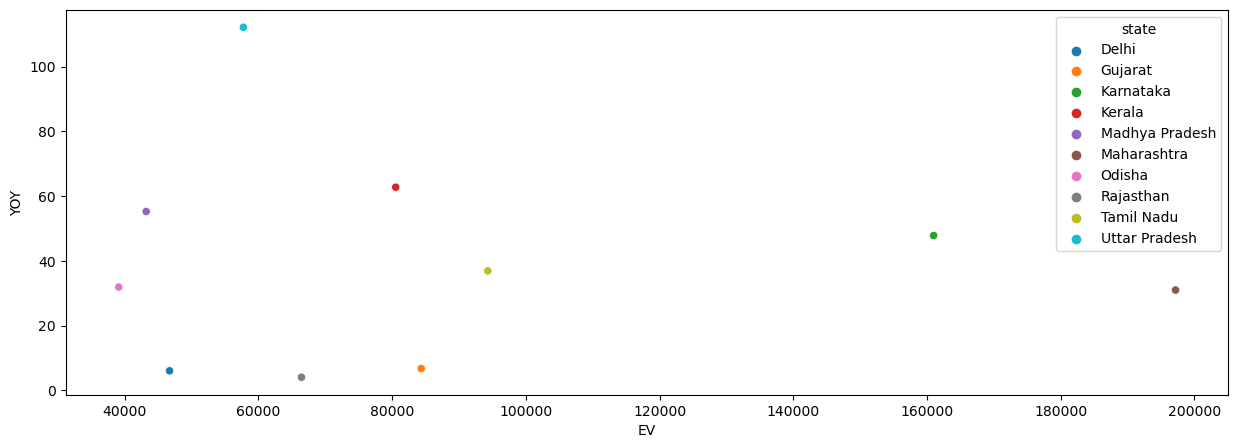

In [31]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = states_year[states_year['fiscal_year']== 2024],
               x = 'EV', y = 'YOY', hue = 'state')
plt.show()

In [32]:
df.head()

,date,state,vehicle_category,EV,Total,fiscal_year,quarter,FV
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1,398
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1,361
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1,515
3,2021-04-01,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1,1256
4,2021-04-01,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1,724


In [33]:
query = """
select
    df.state,
    sum(df.EV) as EV_2022,
    sum(df1.EV) as EV_2024
from
    df
join
    df as df1
on
    df.state = df1.state
where
    df.fiscal_year = 2022 and
    df1.fiscal_year = 2024 and
    df.EV <> 0
group by
    df.state
"""
states_CAGR = run(query)
states_CAGR

,state,EV_2022,EV_2024
0,Andaman & Nicobar Island,484,198
1,Andhra Pradesh,334272,796392
2,Assam,17520,55952
3,Bihar,115896,346587
4,Chandigarh,9864,66171
5,Chhattisgarh,108816,627880
6,DNH and DD,840,3168
7,Delhi,396840,1027928
8,Goa,42672,259176
9,Gujarat,432624,2024616


In [34]:
states_CAGR['CAGR'] = round((((states_CAGR['EV_2024']/states_CAGR['EV_2022'])**(1/3)) - 1) * 100,2)

In [35]:
states_CAGR.sort_values(by = 'CAGR', ascending = False).head(10)

,state,EV_2022,EV_2024,CAGR
4,Chandigarh,9864,66171,88.60
30,West Bengal,64440,404736,84.50
8,Goa,42672,259176,82.45
15,Kerala,327336,1933056,80.75
5,Chhattisgarh,108816,627880,79.36
28,Uttar Pradesh,245328,1386192,78.11
20,Meghalaya,96,532,76.96
17,Madhya Pradesh,189984,994129,73.61
9,Gujarat,432624,2024616,67.27
22,Odisha,208956,899714,62.69


In [36]:
states_CAGR.describe()

,EV_2022,EV_2024,CAGR
count,3.100000e+01,3.100000e+01,31.000000
mean,2.093084e+05,7.831301e+05,44.221613
std,3.082699e+05,1.157330e+06,33.047604
min,2.400000e+01,9.000000e+00,-40.070000
25%,1.024800e+04,3.207500e+04,32.300000
50%,6.511200e+04,2.591760e+05,46.830000
75%,2.863320e+05,1.011028e+06,70.440000
max,1.160976e+06,4.732056e+06,88.600000


In [37]:
med_2022= states_CAGR['EV_2022'].median()
mean_2022= states_CAGR['EV_2022'].mean()

med_2024 = states_CAGR['EV_2024'].median()
mean_2024= states_CAGR['EV_2024'].mean()

print(f'med 2022 = {med_2022}')
print(f'mean 2022 = {mean_2022}')
print(f'med 2024 = {med_2024}')
print(f'mean 2024 = {mean_2024}')

med 2022 = 65112.0
mean 2022 = 209308.38709677418
med 2024 = 259176.0
mean 2024 = 783130.0645161291


# Top 10 CAGR With EV_2024 Greater Than The Median

In [38]:
states_CAGR[states_CAGR['EV_2024'] >= med_2024].sort_values(by = 'CAGR', ascending = False).head(10)

,state,EV_2022,EV_2024,CAGR
30,West Bengal,64440,404736,84.50
8,Goa,42672,259176,82.45
15,Kerala,327336,1933056,80.75
5,Chhattisgarh,108816,627880,79.36
28,Uttar Pradesh,245328,1386192,78.11
17,Madhya Pradesh,189984,994129,73.61
9,Gujarat,432624,2024616,67.27
22,Odisha,208956,899714,62.69
18,Maharashtra,1160976,4732056,59.74
14,Karnataka,1034664,3863736,55.14


# Top 10 CAGR With EV_2022 Greater Than The Mean

In [39]:
states_CAGR[states_CAGR['EV_2024'] >= mean_2024].sort_values(by = 'CAGR', ascending = False).head(10)

,state,EV_2022,EV_2024,CAGR
15,Kerala,327336,1933056,80.75
28,Uttar Pradesh,245328,1386192,78.11
17,Madhya Pradesh,189984,994129,73.61
9,Gujarat,432624,2024616,67.27
22,Odisha,208956,899714,62.69
18,Maharashtra,1160976,4732056,59.74
14,Karnataka,1034664,3863736,55.14
25,Rajasthan,482088,1594656,49.00
7,Delhi,396840,1027928,37.34
26,Tamil Nadu,884712,2263536,36.77


# Top 10 CAGR With EV_2022 Lower Than The Median

In [40]:
states_CAGR[(states_CAGR['EV_2022'] <= med_2022) & (states_CAGR['EV_2024'] >= med_2024)].sort_values(by = 'CAGR',
                                                                                                     ascending = False).head(10)

,state,EV_2022,EV_2024,CAGR
30,West Bengal,64440,404736,84.50
8,Goa,42672,259176,82.45


# Top 10 CAGR With EV_2022 Under The Mean

In [41]:
states_CAGR[(states_CAGR['EV_2022'] <= mean_2022) & (states_CAGR['EV_2024'] >= mean_2024)].sort_values(by = 'CAGR',
                                                                                                     ascending = False).head(10)

,state,EV_2022,EV_2024,CAGR
17,Madhya Pradesh,189984,994129,73.61
22,Odisha,208956,899714,62.69
